In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


df = pd.read_csv('~/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(int)
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
target = 'mpg'
scaler = StandardScaler()

df[predictors] = scaler.fit_transform(df[predictors])
model = LinearRegression()
model.fit(df[predictors], df[target])

LinearRegression()

In [2]:
from sklearn.decomposition import PCA


model = PCA(n_components=6)
model.fit(df[predictors])

PCA(n_components=6)

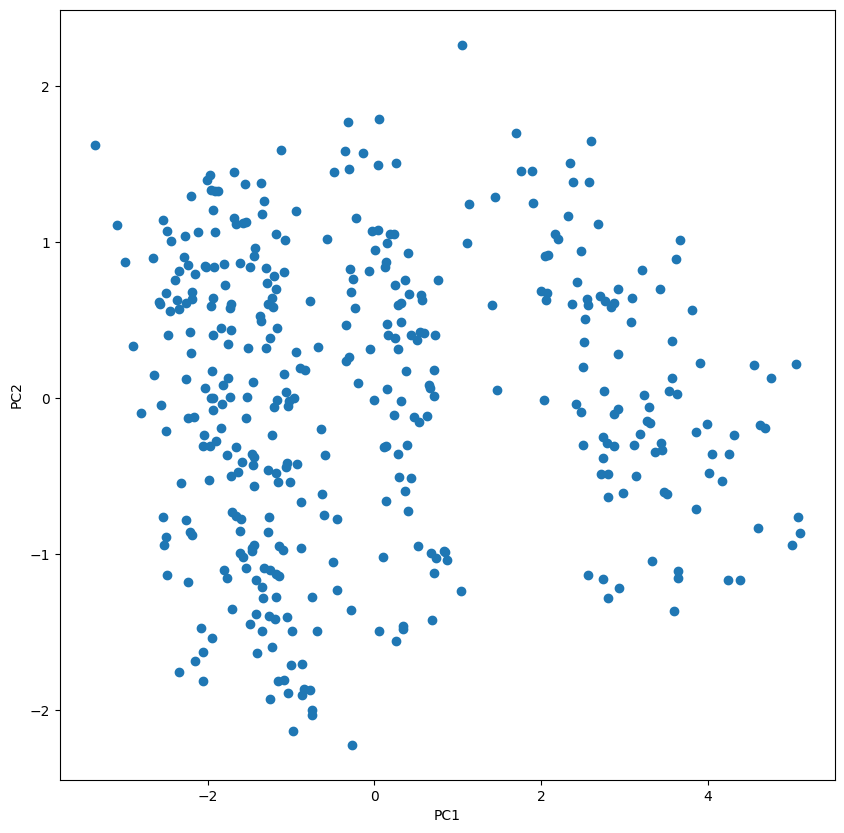

In [3]:
import matplotlib.pyplot as plt

transformed = model.transform(df[predictors])[:,:2]

fig = plt.figure(figsize=(10, 10))
plt.scatter(transformed[:,0], transformed[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

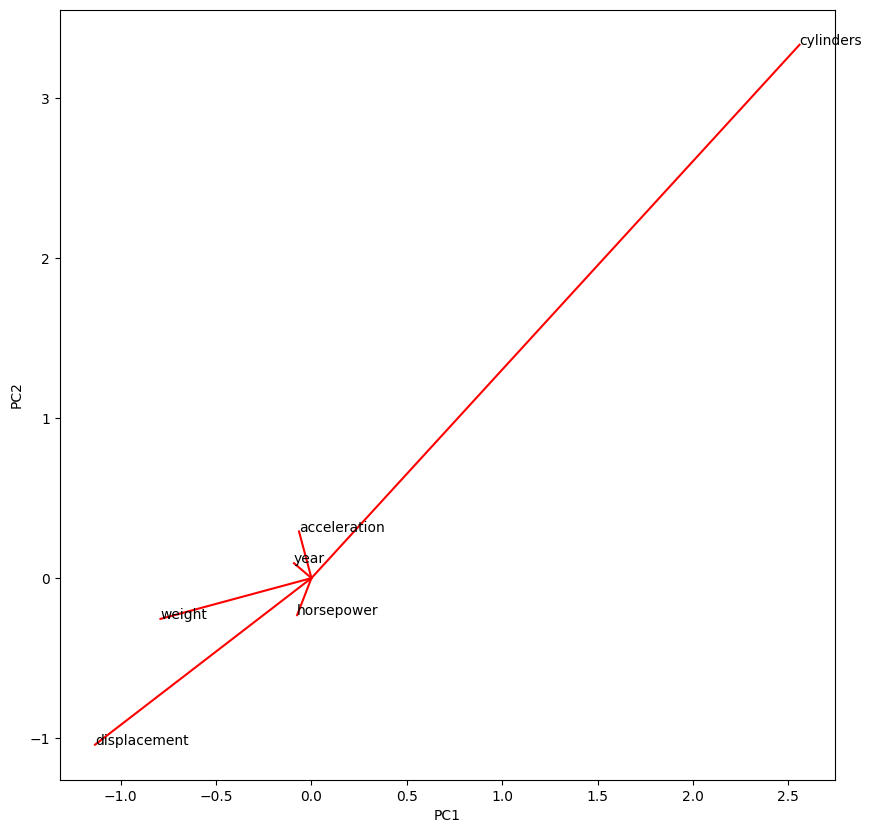

In [5]:
components = model.transform(df[predictors])

fig = plt.figure(figsize=(10, 10))
plt.xlabel('PC1')
plt.ylabel('PC2')

for j in range(components.shape[1]):
    plt.plot([0, components[0,j]], [0, components[1,j]], c='red')
    plt.annotate(predictors[j], (components[0, j], components[1, j]))

plt.show()

[0.7095253  0.13993495 0.11213651 0.0221448  0.01019548 0.00606296]


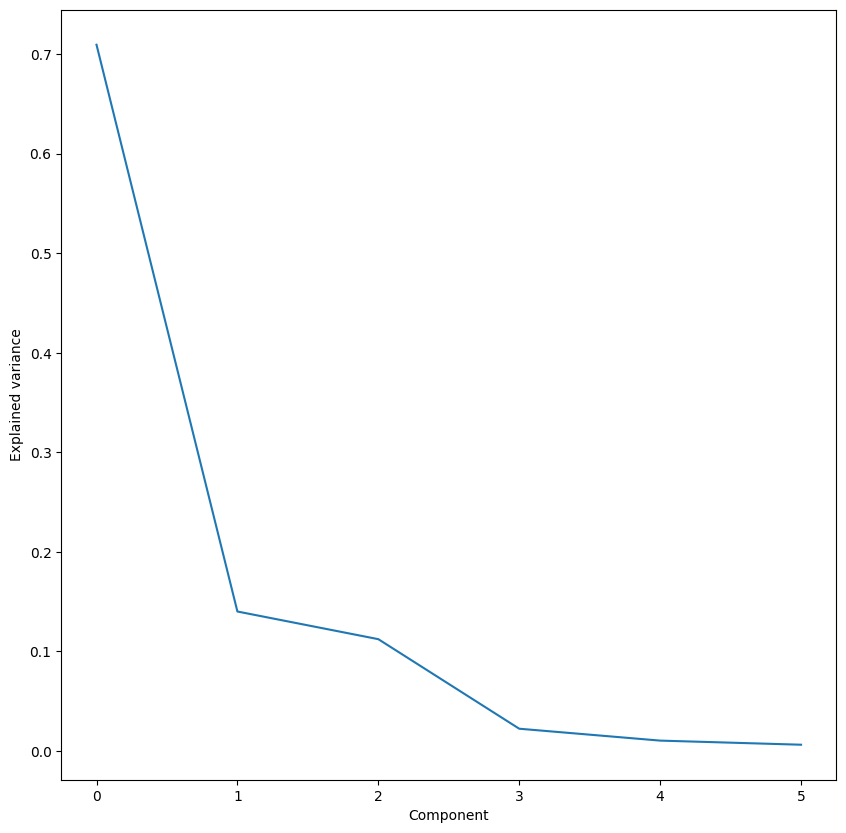

In [30]:
import numpy as np


fig = plt.figure(figsize=(10, 10))
plt.xlabel('Component')
plt.ylabel('Proportion of variance explained')
print(model.explained_variance_ratio_)
plt.plot(np.arange(len(model.explained_variance_ratio_)), model.explained_variance_ratio_)

plt.show()

In [33]:
np.corrcoef(model.transform(df[predictors]).T)

array([[ 1.00000000e+00,  3.83500414e-17, -2.99884106e-16,
        -1.44605342e-15,  3.00804633e-16,  2.85573679e-15],
       [ 3.83500414e-17,  1.00000000e+00,  7.83789830e-16,
        -9.51408039e-16,  2.50939939e-15,  1.58167474e-15],
       [-2.99884106e-16,  7.83789830e-16,  1.00000000e+00,
        -2.23550442e-16,  7.48273630e-16,  9.99300279e-16],
       [-1.44605342e-15, -9.51408039e-16, -2.23550442e-16,
         1.00000000e+00,  1.14726591e-14,  2.29963308e-14],
       [ 3.00804633e-16,  2.50939939e-15,  7.48273630e-16,
         1.14726591e-14,  1.00000000e+00, -1.05787079e-14],
       [ 2.85573679e-15,  1.58167474e-15,  9.99300279e-16,
         2.29963308e-14, -1.05787079e-14,  1.00000000e+00]])

In [34]:
from sklearn.decomposition import FastICA


model = FastICA(n_components=6)
transformed = model.fit_transform(df[predictors])
np.corrcoef(transformed.T)

array([[ 1.00000000e+00,  1.13288064e-15,  1.53816869e-15,
        -1.72197857e-16, -1.40477199e-15,  4.21431597e-16],
       [ 1.13288064e-15,  1.00000000e+00, -3.67506479e-15,
         1.44923756e-15,  1.51352853e-15, -9.17633316e-16],
       [ 1.53816869e-15, -3.67506479e-15,  1.00000000e+00,
         2.26576127e-15,  5.07530526e-16,  1.78088836e-15],
       [-1.72197857e-16,  1.44923756e-15,  2.26576127e-15,
         1.00000000e+00, -3.36238973e-15,  1.64041116e-15],
       [-1.40477199e-15,  1.51352853e-15,  5.07530526e-16,
        -3.36238973e-15,  1.00000000e+00,  2.24650230e-15],
       [ 4.21431597e-16, -9.17633316e-16,  1.78088836e-15,
         1.64041116e-15,  2.24650230e-15,  1.00000000e+00]])